In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [59]:
data = pd.read_csv (r'C:\Users\HP\Downloads\Copy of HINDALCO_1D.csv')   
df = pd.DataFrame(data, columns= ['datetime','close','high','low','open','volume','instrument'])

print(type(df.datetime))

<class 'pandas.core.series.Series'>


In [39]:
from pathlib import Path
Path('my_data.db').touch()

In [41]:
import sqlite3
conn = sqlite3.connect('my_data.db')
c = conn.cursor()

In [42]:
 users = pd.read_csv(r'C:\Users\HP\Downloads\Copy of HINDALCO_1D.csv')
# write the data to a sqlite table
users.to_sql('users', conn, if_exists='append', index = False)

In [43]:
c.execute('''SELECT * FROM users''').fetchall()

[('2014-01-24 00:00:00', 114, 115.35, 113, 113.15, 5737135, 'HINDALCO'),
 ('2014-01-27 00:00:00', 111.1, 112.7, 109.3, 112, 8724577, 'HINDALCO'),
 ('2014-01-28 00:00:00', 113.8, 115, 109.75, 110, 4513345, 'HINDALCO'),
 ('2014-01-29 00:00:00', 111.75, 114.75, 111.15, 114.5, 4713458, 'HINDALCO'),
 ('2014-01-30 00:00:00', 108.1, 110.7, 107.6, 110.2, 5077231, 'HINDALCO'),
 ('2014-01-31 00:00:00', 109.55, 110, 107, 109.05, 8287236, 'HINDALCO'),
 ('2014-02-03 00:00:00', 103.45, 109.4, 103, 109, 5572627, 'HINDALCO'),
 ('2014-02-04 00:00:00', 102.45, 103.45, 99.8, 102, 13935173, 'HINDALCO'),
 ('2014-02-05 00:00:00', 104.25, 105.15, 101, 102.4, 9106760, 'HINDALCO'),
 ('2014-02-06 00:00:00', 105.75, 106.5, 103.1, 104.65, 10194884, 'HINDALCO'),
 ('2014-02-07 00:00:00', 106.4, 107.7, 104.75, 106.15, 9650511, 'HINDALCO'),
 ('2014-02-10 00:00:00', 106.8, 107.7, 105.8, 106.45, 3124538, 'HINDALCO'),
 ('2014-02-11 00:00:00', 104.55, 107.1, 104.25, 106.9, 3964390, 'HINDALCO'),
 ('2014-02-12 00:00:00', 1

In [44]:
pd.read_sql('''SELECT * FROM users''', conn)


,datetime,close,high,low,open,volume,instrument
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO
...,...,...,...,...,...,...,...
3640,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO
3641,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO
3642,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO
3643,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO


In [70]:
from datetime import datetime
df["new_date"] = df["datetime"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
df

,datetime,close,high,low,open,volume,instrument,new_date
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,2014-01-24
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,2014-01-27
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,2014-01-28
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,2014-01-29
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,2014-01-30
...,...,...,...,...,...,...,...,...
1210,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,2018-12-21
1211,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,2018-12-24
1212,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,2018-12-26
1213,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,2018-12-27


In [72]:
df=df.set_index(df['new_date'].values)

,datetime,close,high,low,open,volume,instrument,new_date
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,2014-01-24
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,2014-01-27
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,2014-01-28
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,2014-01-29
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,2014-01-30
...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,2018-12-21
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,2018-12-24
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,2018-12-26
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,2018-12-27


# THREE MOVING Average ALGORITHM

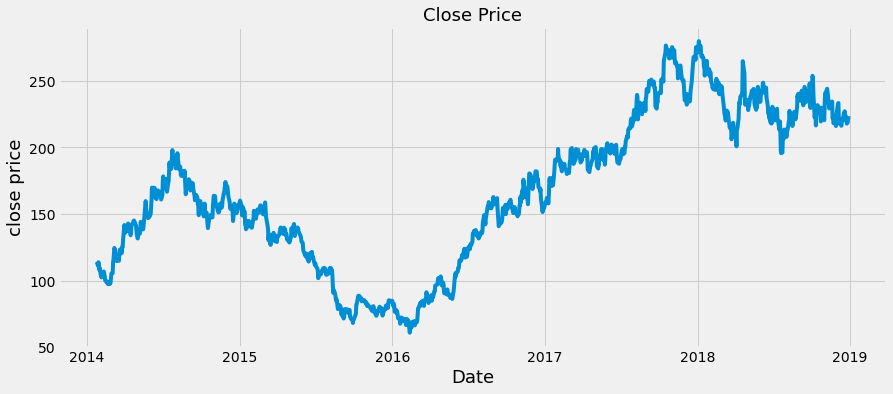

In [73]:
plt.figure(figsize=(13.2, 5.5))
plt.title('Close Price', fontsize=18)
plt.plot(df['close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('close price', fontsize=18)
plt.show()

In [74]:
ShortEMA = df.close.ewm(span=5, adjust=False).mean()
MiddleEMA = df.close.ewm(span=21, adjust=False).mean()
longEMA = df.close.ewm(span=63, adjust=False).mean()


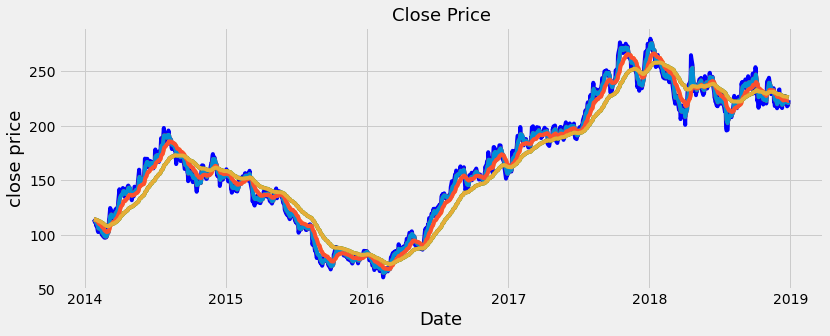

In [80]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize=18)
plt.plot(df['close'], label='close price', color= 'blue')
plt.plot(ShortEMA, label='Short/Fast EMA', color= 'red')
plt.plot(MiddleEMA, label='Middle/Medium EMA', color= 'orange')
plt.plot(longEMA, label='long EMA', color= 'green')
plt.plot(ShortEMA)
plt.plot(MiddleEMA)
plt.plot(longEMA)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('close price', fontsize=18)
plt.show()

In [139]:
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = longEMA

,datetime,close,high,low,open,volume,instrument,new_date,Short,Middle,Long
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,2014-01-24,114.000000,114.000000,114.000000
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,2014-01-27,113.033333,113.736364,113.909375
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,2014-01-28,113.288889,113.742149,113.905957
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,2014-01-29,112.775926,113.561044,113.838583
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,2014-01-30,111.217284,113.064586,113.659253
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,2018-12-21,224.143289,223.908612,226.716306
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,2018-12-24,222.045526,223.357829,226.439234
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,2018-12-26,220.897017,222.925299,226.194258
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,2018-12-27,220.798012,222.713908,226.019437


In [143]:
def buy_sell_function(data):
    buy_list =[]
    sell_list =[]
    flag_long =False
    flag_short =False
    
    for i in range(0, len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    
    
    return (buy_list, sell_list)
            

In [146]:
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

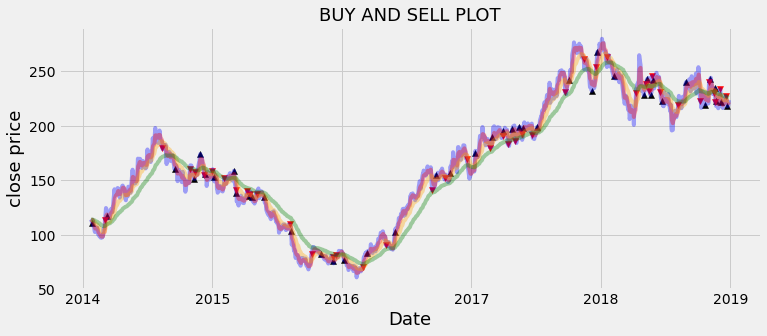

In [156]:
plt.figure(figsize=(11.2, 4.5))
plt.title('BUY AND SELL PLOT', fontsize=18)
plt.plot(df['close'], label='close price', color= 'blue', alpha =0.35)
plt.plot(ShortEMA, label='Short/Fast EMA', color= 'red',alpha =0.35)
plt.plot(MiddleEMA, label='Middle/Medium EMA', color= 'orange',alpha =0.35)
plt.plot(longEMA, label='long/slow EMA', color= 'green',alpha =0.35)
plt.scatter(df.index, df['Buy'], color ='black', marker='^', alpha =1 )
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha =1 )

plt.xlabel('Date', fontsize = 18)
plt.ylabel('close price', fontsize=18)
plt.show()